In [77]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector
from qiskit.providers.ibmq import least_busy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
def qubit_rotation(circuit, n):
    circuit.h(n)
    for k in range(n):
        circuit.cu1(np.pi/(2 ** (n - k)), k, n)
        
def qubit_swap(circuit, n):
    for bit in range(n//2):
        circuit.swap(bit, n - 1 - bit)

In [139]:
def qft(n):
    qc = QuantumCircuit(n)
    for i in reversed(range(n)):
        qubit_rotation(qc, i)
    qubit_swap(qc, n)
    return qc

In [216]:
n = 5

def visualize_qft(input_state, n, backend):
    qc = QuantumCircuit(n)
    qft_circ = qft(n)
    
    for bit in range(n):
        if (input_state & (1 << bit)):
            qc.x(bit)
            
    qc = qc + qft_circ
    job = execute(qc, backend)
    return(plot_bloch_multivector(job.result().get_statevector()))

In [218]:
plots = []
backend = Aer.get_backend('statevector_simulator')
for input_state in range(2 ** n):
    plots.append(visualize_qft(input_state, n, backend))

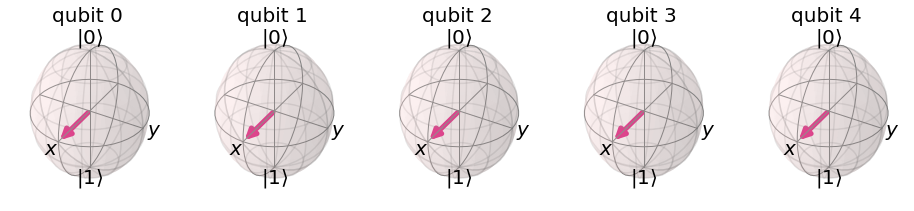

In [219]:
plots[0]

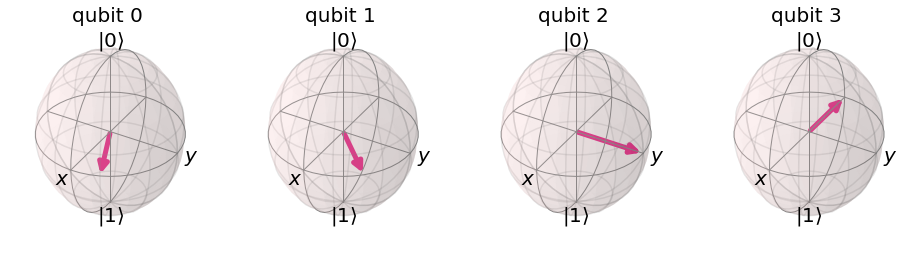

In [135]:
plots[1]

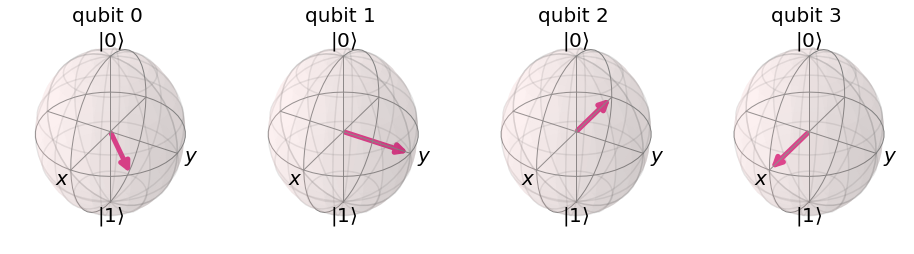

In [136]:
plots[2]

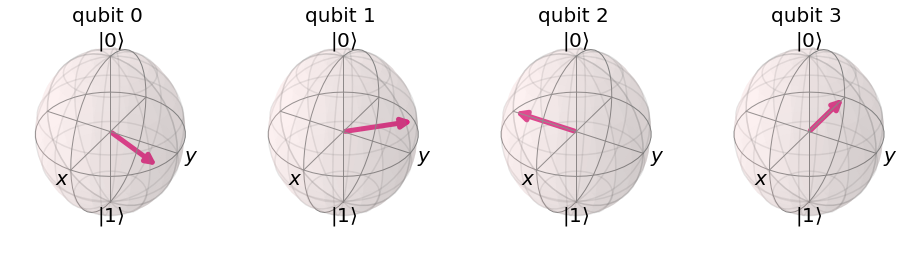

In [137]:
plots[3]

In [144]:
qft_circ = qft(4)

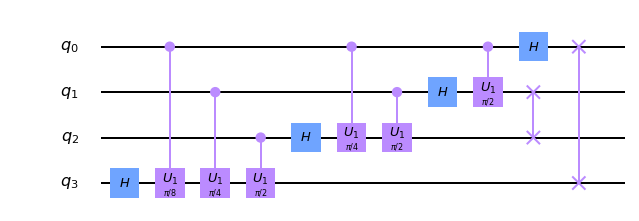

In [146]:
qft_circ.draw(output = 'mpl')

In [147]:
iqft_circ = qft_circ.inverse()

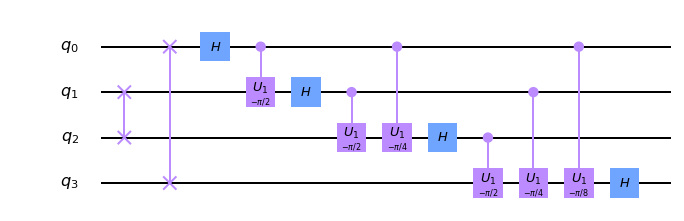

In [149]:
iqft_circ.draw(output = 'mpl')

In [211]:
n = 3
input_data = 7
qc = QuantumCircuit(n, n)
qc.h(range(n))

for bit in range(n):
    theta = (input_data * 2 * np.pi)/(2 ** (n - bit))
    qc.u1(theta, bit)
qc.barrier()

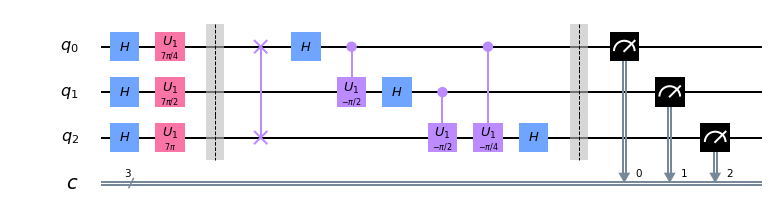

In [212]:
qft_circ = qft(n)
iqft_circ = qft_circ.inverse()
qc = qc + iqft_circ
qc.barrier()
qc.measure(range(n), range(n))
qc.draw(output = 'mpl')

In [213]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)

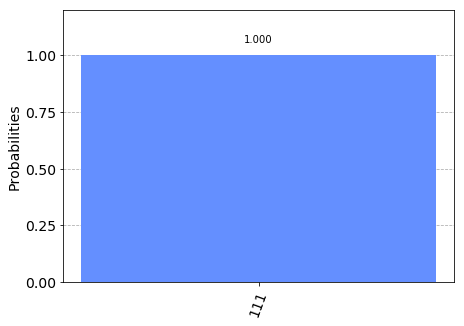

In [214]:
plot_histogram(job.result().get_counts())

In [206]:
IBMQ.save_account('7958dfde9dacd7439f1ea1a6cecb93b036d250f1226009c2a365da64e76038303a72081f0e115f9c4f35802e2c79320c7ee563595e2b910c2b49b223104f0ee4')

Credentials already present. Set overwrite=True to overwrite.


In [207]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

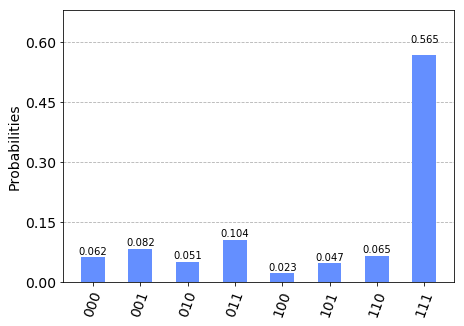

In [215]:
provider = IBMQ.get_provider(hub='ibm-q')
backend_list = provider.backends(filters = lambda b: b.configuration().n_qubits >= 4 and not b.configuration().simulator and b.status().operational == True)
backend = least_busy(backend_list)
job = execute(qc, backend, shots=1024)
plot_histogram(job.result().get_counts())

In [210]:
backend.configuration()

QasmBackendConfiguration(allow_object_storage=True, allow_q_circuit=False, allow_q_object=True, backend_name='ibmqx2', backend_version='2.0.5', basis_gates=['u1', 'u2', 'u3', 'cx', 'id'], conditional=False, coupling_map=[[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]], credits_required=True, description='5 qubit device', gates=[GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='id', parameters=[], qasm_def='gate id q { U(0,0,0) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u1', parameters=['lambda'], qasm_def='gate u1(lambda) q { U(0,0,lambda) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u2', parameters=['phi', 'lambda'], qasm_def='gate u2(phi,lambda) q { U(pi/2,phi,lambda) q; }'), GateConfig(coupling_map=[[0], [1], [2], [3], [4]], name='u3', parameters=['theta', 'phi', 'lambda'], qasm_def='gate u3(theta,phi,lambda) q { U(theta,phi,lambda) q; }'), GateConfig(coupling_map=[[0, 1], [0, 2], [1, 0]